In [19]:
import pickle
import dill
import pandas as pd
import shap
import numpy as np
shap.initjs()
if __name__ == '__main__':
# model = load_model
    data_path = 'housing_no_normalization'
    job_name = 'test_2'
    fold=2
    model_string ='lightgbm'
    tid=2
    save_path = f'{job_name}/{data_path}_{model_string}_{fold}/'
    obj = pickle.load(open(save_path + f'best_model_{tid}.p', "rb"))
    model = dill.loads(obj)
    data = np.load(data_path + f'/fold_{fold}.npy', allow_pickle=True).tolist()
    X_tr, Y_tr = data['tr']
    X_val, Y_val = data['val']
    X_test, Y_test = data['test']
    scaler = data['normalizer']
    column_names = data['column_names']
    model.params['objective']='regression'
    X_explain =pd.DataFrame(X_test,columns=column_names)
    #load test_data
    explainer = shap.TreeExplainer(model)

In [20]:
model.params

{'boosting_type': 'gbdt',
 'application': 'regression',
 'metric': 'mse',
 'num_class': 1,
 'learning_rate': 0.022501460559946524,
 'num_leaves': 2735,
 'min_data_in_leaf': 15,
 'min_sum_hessian_in_leaf': 1.093757642266069,
 'max_depth': -1,
 'lambda_l1': 5.129006584065676,
 'lambda_l2': 9.606510272662913,
 'bagging_freq': 4,
 'max_bin': 175,
 'feature_fraction': 0.9199038041997125,
 'bagging_fraction': 0.7581427460041787,
 'num_iterations': 1000,
 'early_stopping_round': 100,
 'objective': 'regression'}

In [21]:
shap_values = explainer.shap_values(X_explain)

In [23]:
#Single pred
shap.force_plot(explainer.expected_value, shap_values[0,:], X_explain.iloc[0,:])



In [24]:
 #many preds
shap.force_plot(explainer.expected_value, shap_values[:1000,:], X_explain.iloc[:1000,:])



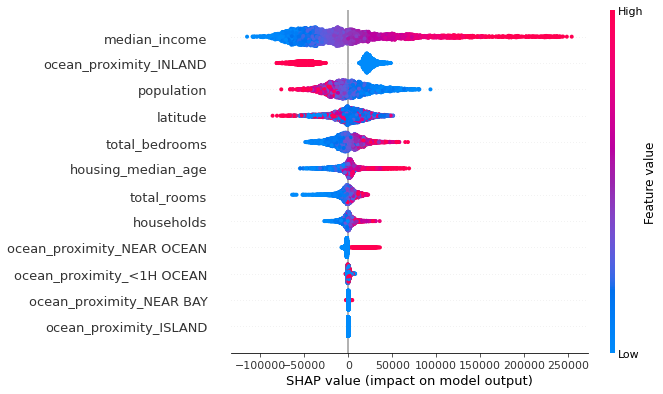

In [25]:
#summary plot
shap.summary_plot(shap_values, X_explain)


    #dependenct plot


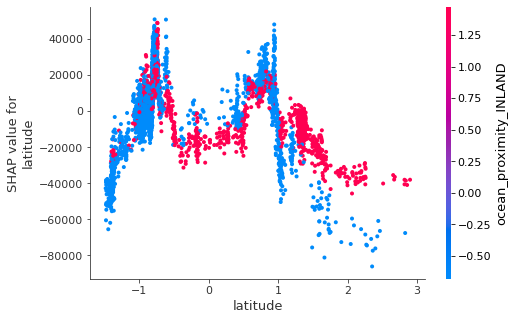

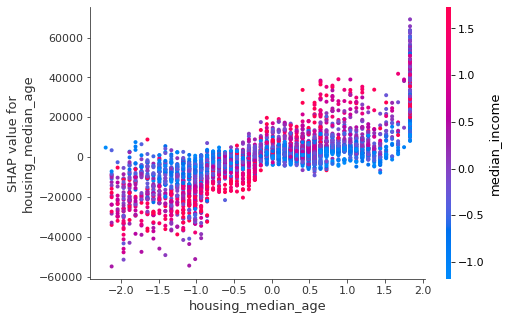

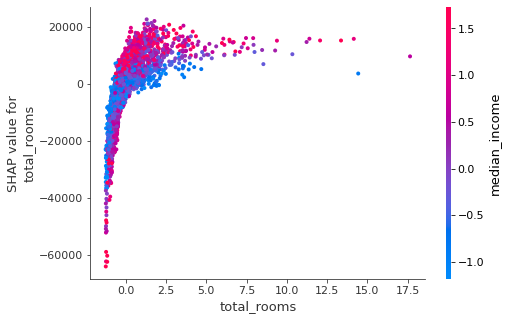

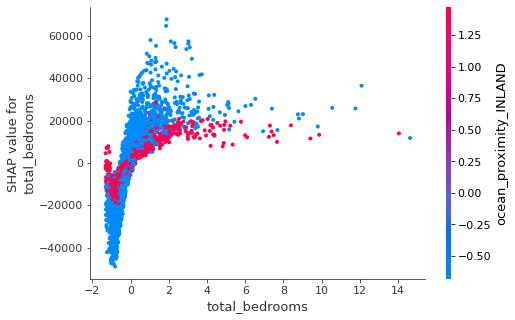

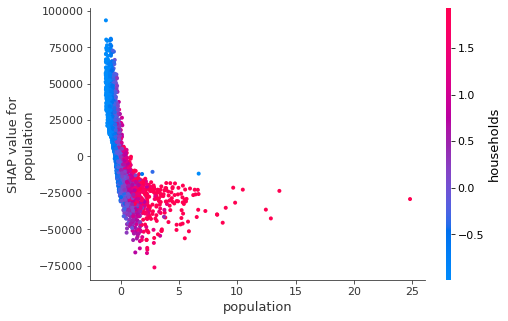

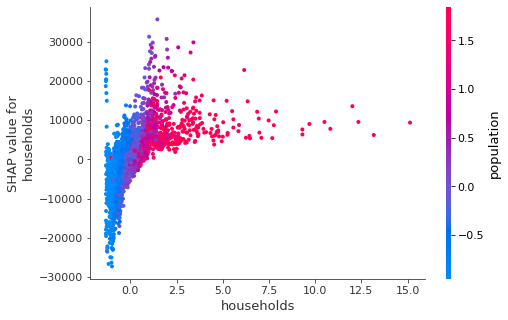

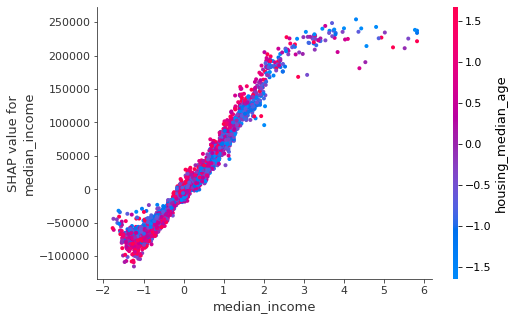

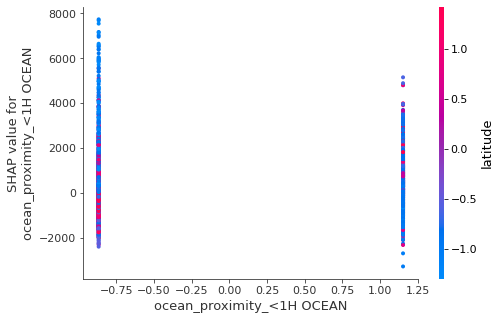

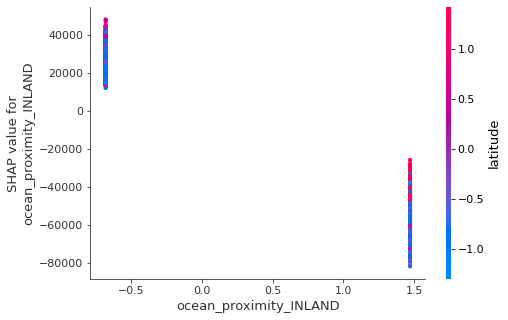

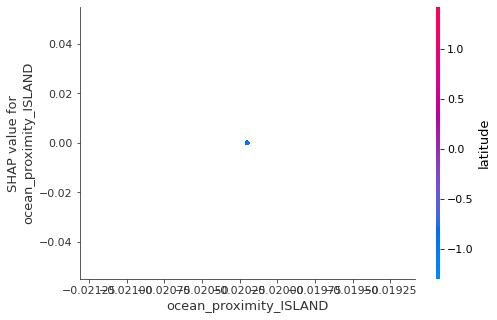

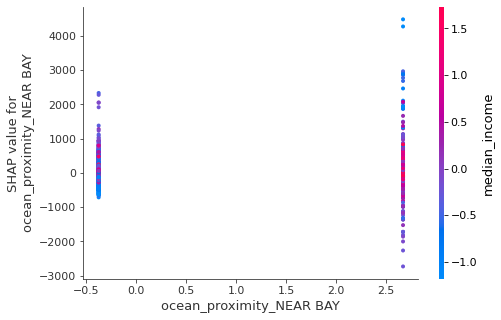

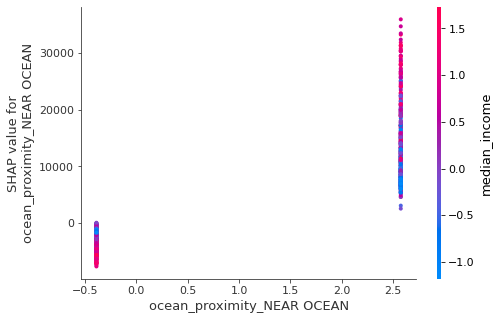

In [26]:
for name in column_names:
    shap.dependence_plot(name, shap_values, X_explain, display_features=X_explain)